In [427]:
!pip install category_encoders


In [428]:
! pip install dataprep
! pip install dabl

In [429]:
!pip install matplotlib


#Import Package

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataprep
import sklearn

print(f'Notebook tested on: \n')

print(f'numpy {np.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
print(f'dataprep {dataprep.__version__}')
print(f'scikit-learn {sklearn.__version__}')

Notebook tested on: 

numpy 1.26.4
pandas 1.5.3
seaborn 0.12.2
dataprep 0.4.1
scikit-learn 1.5.1


#Loading Data

In [431]:
# The following assumes that the dataset is in a subfolder called Data


data=pd.read_csv('listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53996003,https://www.airbnb.com/rooms/53996003,20231212054032,2023-12-12,city scrape,Rental unit in St Leonards · ★4.66 · 1 bedroom...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,153195376,...,4.85,4.86,4.69,PID-STRA-30910,f,6,6,0,0,2.73
1,883656189858403878,https://www.airbnb.com/rooms/883656189858403878,20231212054032,2023-12-12,city scrape,Rental unit in Coogee · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,23868355,...,5.00,5.00,5.00,PID-STRA-52221,f,1,0,1,0,0.15
2,883870891812565255,https://www.airbnb.com/rooms/883870891812565255,20231212054032,2023-12-13,city scrape,Rental unit in McMahons Point · ★4.63 · 2 bedr...,NaN,McMahons Point is a picturesque and affluent H...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,5.00,4.75,4.50,PID-STRA-45906,f,245,245,0,0,1.29
3,8688488,https://www.airbnb.com/rooms/8688488,20231212054032,2023-12-12,previous scrape,Rental unit in Manly · 1 bedroom · 1 bed · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/fbcc5710-269e...,5870556,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
4,1029336597495719710,https://www.airbnb.com/rooms/1029336597495719710,20231213185037,2023-12-14,city scrape,Home in South West Rocks · ★New · 3 bedrooms ·...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,363191034,...,NaN,NaN,NaN,PID-STRA-51457,t,29,29,0,0,NaN


In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37636 non-null  int64  
 1   listing_url                                   37636 non-null  object 
 2   scrape_id                                     37636 non-null  int64  
 3   last_scraped                                  37636 non-null  object 
 4   source                                        37636 non-null  object 
 5   name                                          37636 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         21072 non-null  object 
 8   picture_url                                   37636 non-null  object 
 9   host_id                                       37636 non-null 

# 1.Inscpection of Response Data

## 1.1 Check the Response Data

In [433]:
data['price'].isnull().sum()/data['id'].nunique()

0.05330003188436603

Since there was 5% data missing, I will drop them to miniminse the bias of prediction.

In [434]:
#remove rows that contain the NA in targer price
data = data[~data['price'].isnull()]
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53996003,https://www.airbnb.com/rooms/53996003,20231212054032,2023-12-12,city scrape,Rental unit in St Leonards · ★4.66 · 1 bedroom...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,153195376,...,4.85,4.86,4.69,PID-STRA-30910,f,6,6,0,0,2.73
1,883656189858403878,https://www.airbnb.com/rooms/883656189858403878,20231212054032,2023-12-12,city scrape,Rental unit in Coogee · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,23868355,...,5.00,5.00,5.00,PID-STRA-52221,f,1,0,1,0,0.15
2,883870891812565255,https://www.airbnb.com/rooms/883870891812565255,20231212054032,2023-12-13,city scrape,Rental unit in McMahons Point · ★4.63 · 2 bedr...,NaN,McMahons Point is a picturesque and affluent H...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,5.00,4.75,4.50,PID-STRA-45906,f,245,245,0,0,1.29
3,8688488,https://www.airbnb.com/rooms/8688488,20231212054032,2023-12-12,previous scrape,Rental unit in Manly · 1 bedroom · 1 bed · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/fbcc5710-269e...,5870556,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
4,1029336597495719710,https://www.airbnb.com/rooms/1029336597495719710,20231213185037,2023-12-14,city scrape,Home in South West Rocks · ★New · 3 bedrooms ·...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,363191034,...,NaN,NaN,NaN,PID-STRA-51457,t,29,29,0,0,NaN


In [435]:
#change the data type of price and remoce $
data['price'] = data['price'].str.strip('$').str.replace(',', '').astype('float64')
data['price']

0        151.0
1        224.0
2        332.0
3        189.0
4        445.0
         ...  
37631    125.0
37632    380.0
37633     97.0
37634    443.0
37635    600.0
Name: price, Length: 35630, dtype: float64

In [436]:
data['price'].describe()

count     35630.000000
mean        381.896688
std         796.643230
min          17.000000
25%         135.000000
50%         230.000000
75%         415.000000
max      100000.000000
Name: price, dtype: float64

In [437]:
# Outlier Handling using IQR for 'price'
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_out

data = remove_outliers_iqr(data, 'price')

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 37635
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32536 non-null  int64  
 1   listing_url                                   32536 non-null  object 
 2   scrape_id                                     32536 non-null  int64  
 3   last_scraped                                  32536 non-null  object 
 4   source                                        32536 non-null  object 
 5   name                                          32536 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         18361 non-null  object 
 8   picture_url                                   32536 non-null  object 
 9   host_id                                       32536 non-null 

##1.2 Split train and test

In [439]:
from sklearn.model_selection import train_test_split

# I like to work with the indexes
index_train, index_valid = train_test_split(data.index, train_size=0.8, random_state=42)

# Write training and test sets
train = data.loc[index_train, :].copy() # copy() does not make a difference here but it's better to be explicit
test = data.loc[index_valid, :].copy()

y_train = train['price'].to_numpy()
y_test = test['price'].to_numpy()

y_train.shape, y_test.shape,train.shape

((26028,), (6508,), (26028, 75))

# 2.EDA & Feature Enginnering of data

## 2.1 Dectecing Useless Data

In [440]:
from dabl import detect_types

detect = detect_types(train)
detect

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
id,True,False,False,False,False,False,False,False
listing_url,False,False,False,False,False,False,True,False
scrape_id,False,False,False,False,True,False,False,False
last_scraped,False,False,False,False,False,True,False,False
source,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
calculated_host_listings_count,False,False,True,False,False,False,False,False
calculated_host_listings_count_entire_homes,False,False,True,False,False,False,False,False
calculated_host_listings_count_private_rooms,False,False,True,False,False,False,False,False
calculated_host_listings_count_shared_rooms,False,False,False,False,False,False,False,True


In [441]:
useless_features = detect[detect['useless'] == True].index.to_list()
train[useless_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   description                                  0 non-null      float64
 1   host_has_profile_pic                         26028 non-null  object 
 2   neighbourhood_group_cleansed                 0 non-null      float64
 3   bathrooms                                    0 non-null      float64
 4   bedrooms                                     0 non-null      float64
 5   amenities                                    26028 non-null  object 
 6   calendar_updated                             0 non-null      float64
 7   calculated_host_listings_count_shared_rooms  26028 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [442]:
train['host_has_profile_pic'].value_counts().reset_index()
train['bedrooms'].value_counts().reset_index()

,index,bedrooms


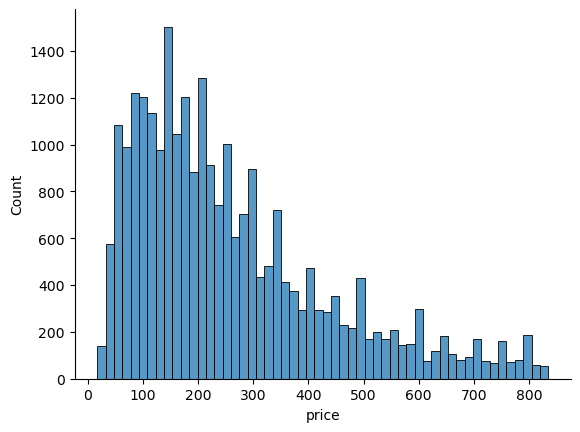

In [443]:
# price distribution
sns.histplot(x=train['price'])
sns.despine()
plt.show()

In [444]:
#take loge for price
train['log_price'] = np.log(train['price'])
test['log_price'] = np.log(test['price'])


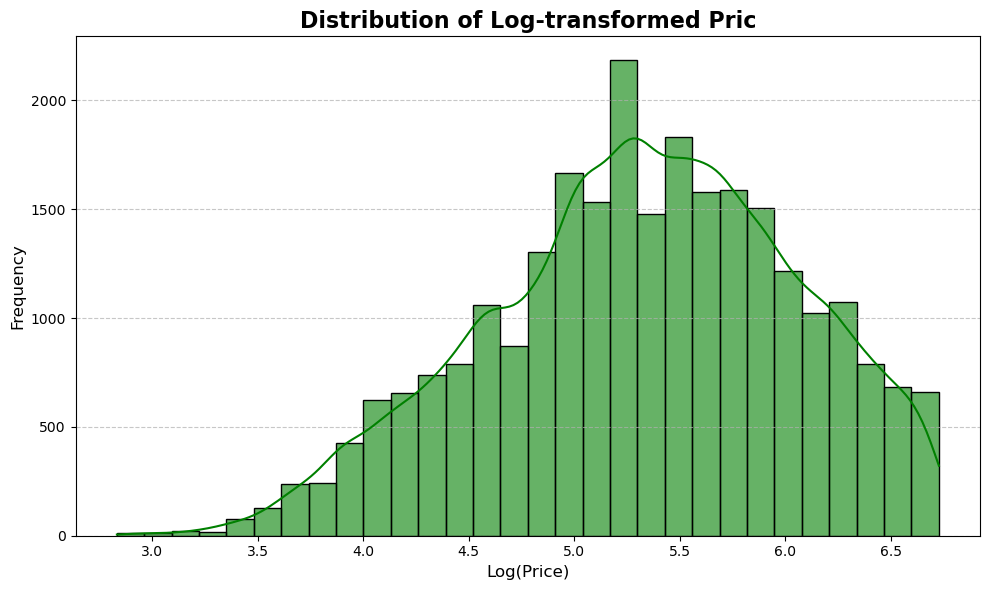

In [445]:

train['log_price'] = np.log(train['price'])

plt.figure(figsize=(10, 6))
sns.histplot(train['log_price'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of Log-transformed Pric', fontsize=16, fontweight='bold')
plt.xlabel('Log(Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('4', dpi=300, bbox_inches='tight')
plt.show()

In [446]:
#take a look of amenatities
train['amenities'].value_counts().reset_index()


,index,amenities
0,[],26028


In [447]:
#take a look of amenatities
train['calculated_host_listings_count_shared_rooms'].value_counts().reset_index()

,index,calculated_host_listings_count_shared_rooms
0,0,25736
1,1,224
2,5,22
3,2,18
4,3,15
5,4,13


##2.2 Data Cleaning

In [448]:
#features not needed from detect and enter manaully
features_drop = ['name','id', 'listing_url', 'scrape_id', 'neighbourhood_group_cleansed'
                ,'calendar_updated','amenities','bedrooms','bathrooms','description','picture_url'
                ,'host_url','host_id','host_name','host_about','host_thumbnail_url','host_picture_url'
                ,'latitude','longitude','last_scraped','host_neighbourhood','neighborhood_overview','license']
features_date = ['calendar_last_scraped','host_since','first_review','last_review' ]
print("Train DataFrame Columns:", train.columns)

Train DataFrame Columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'max

In [449]:
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)



In [450]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        26028 non-null  object 
 1   host_since                                    26028 non-null  object 
 2   host_location                                 19332 non-null  object 
 3   host_response_time                            17180 non-null  object 
 4   host_response_rate                            17180 non-null  object 
 5   host_acceptance_rate                          17715 non-null  object 
 6   host_is_superhost                             26008 non-null  object 
 7   host_listings_count                           26028 non-null  float64
 8   host_total_listings_count                     26028 non-null  float64
 9   host_verifications                            26028 non-n

##2.3 EDA & Feature Engineering


In [451]:
# classify different features
norimal_data_with_missing = ['host_is_superhost','host_verifications','host_has_profile_pic'
                ,'host_identity_verified','has_availability',
                ]
ordinal_data_with_missing = ['host_response_time','review_scores_rating',
                                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                                ,'review_scores_communication','review_scores_location','review_scores_value']


###2.3.1 Discrete Predictor

####2.3.1.1 EDA of Discrete Predictor



In [452]:
#change the data type of the bathrooms_text from string to float

train['bathrooms_No.'] = train['bathrooms_text'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
test['bathrooms_No.'] = test['bathrooms_text'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


In [453]:
# drop the bathrooms_text from train and test
train = train.drop('bathrooms_text', axis=1)
test = test.drop('bathrooms_text', axis=1)

<Axes: xlabel='bathrooms_No.'>

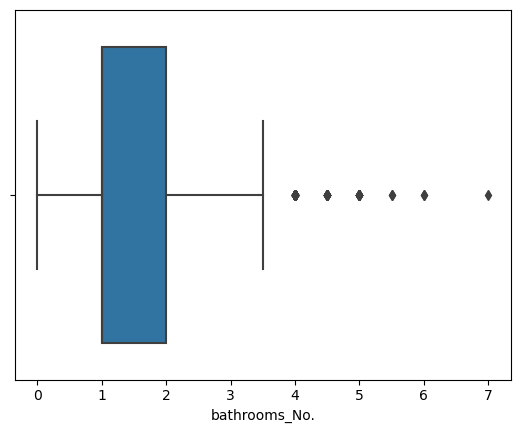

In [454]:
# take a view of bathrooms_No.
sns.boxplot(x=train['bathrooms_No.'])

In [455]:
#show the NA value for bathrooms_No and beds
train[['bathrooms_No.','beds']].isna().sum().reset_index()

,index,0
0,bathrooms_No.,69
1,beds,323


In [456]:
#for the bathrooms_No and beds, at least a property have one bed or one bath, so fill with 1
train[['bathrooms_No.','beds']] = train[['bathrooms_No.','beds']].fillna(1)
test[['bathrooms_No.','beds']] = test[['bathrooms_No.','beds']].fillna(1)

In [457]:
train['reviews_per_month'].describe()

count    20233.000000
mean         1.163550
std          1.450338
min          0.010000
25%          0.140000
50%          0.640000
75%          1.690000
max         18.680000
Name: reviews_per_month, dtype: float64

<Axes: xlabel='number_of_reviews'>

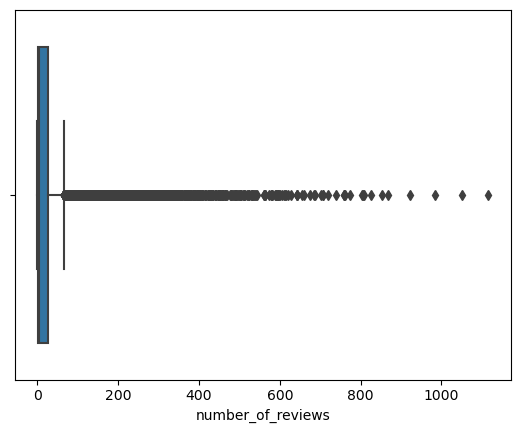

In [458]:
sns.boxplot(x=train['number_of_reviews'])

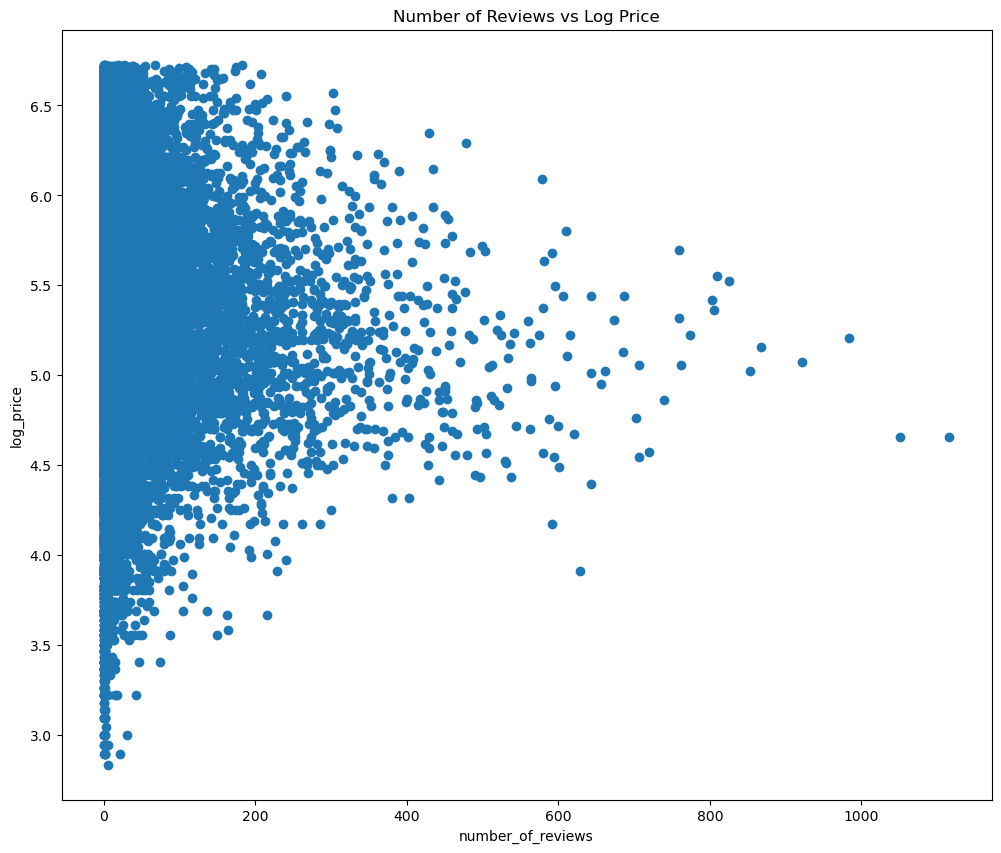

In [459]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
# Access the 'train' DataFrame directly instead of through 'plot'
plt.scatter(train['number_of_reviews'], train['log_price'])
plt.xlabel('number_of_reviews')
plt.ylabel('log_price')
plt.title('Number of Reviews vs Log Price')
plt.show()

In [460]:
# make a funtion for reviews < 1 to little reviews, reviews > 25 to lot of reviews, and in between
# are some review. this function is classify the number of reivews to 3 classes
def review_reclass(x):
  if x <= 1:
    return 'little reviews'
  elif x > 25:
    return 'lot reviews'
  else:
    return 'some reviews'

train['number_of_reviews'] = train['number_of_reviews'].apply(review_reclass)
test['number_of_reviews'] = test['number_of_reviews'].apply(review_reclass)

In [461]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        26028 non-null  object 
 1   host_since                                    26028 non-null  object 
 2   host_location                                 19332 non-null  object 
 3   host_response_time                            17180 non-null  object 
 4   host_response_rate                            17180 non-null  object 
 5   host_acceptance_rate                          17715 non-null  object 
 6   host_is_superhost                             26008 non-null  object 
 7   host_listings_count                           26028 non-null  float64
 8   host_total_listings_count                     26028 non-null  float64
 9   host_verifications                            26028 non-n

In [462]:
#create a new column that reflects the number of availability_30, availability_60, and availability_90 columns that are zero for each row
train['aviliablity_30_zero'] = (train['availability_30'] == 0).astype(int)
test['aviliablity_30_zero'] = (test['availability_30'] == 0).astype(int)
train['aviliablity_60_zero'] = (train['availability_60'] == 0).astype(int)
test['aviliablity_60_zero'] = (test['availability_60'] == 0).astype(int)
train['aviliablity_90_zero'] = (train['availability_90'] == 0).astype(int)
test['aviliablity_90_zero'] = (test['availability_90'] == 0).astype(int)

# Sum up to create new column "availability_zero"
train['aviliablity_zero'] = train['aviliablity_30_zero'] + train['aviliablity_60_zero'] + train['aviliablity_90_zero']
test['aviliablity_zero'] = test['aviliablity_30_zero'] + test['aviliablity_60_zero'] + test['aviliablity_90_zero']

# Display the new column
train['aviliablity_zero']



37256    3
36599    0
6322     3
22800    3
29953    3
        ..
34464    3
6246     0
976      3
18266    1
27366    0
Name: aviliablity_zero, Length: 26028, dtype: int64

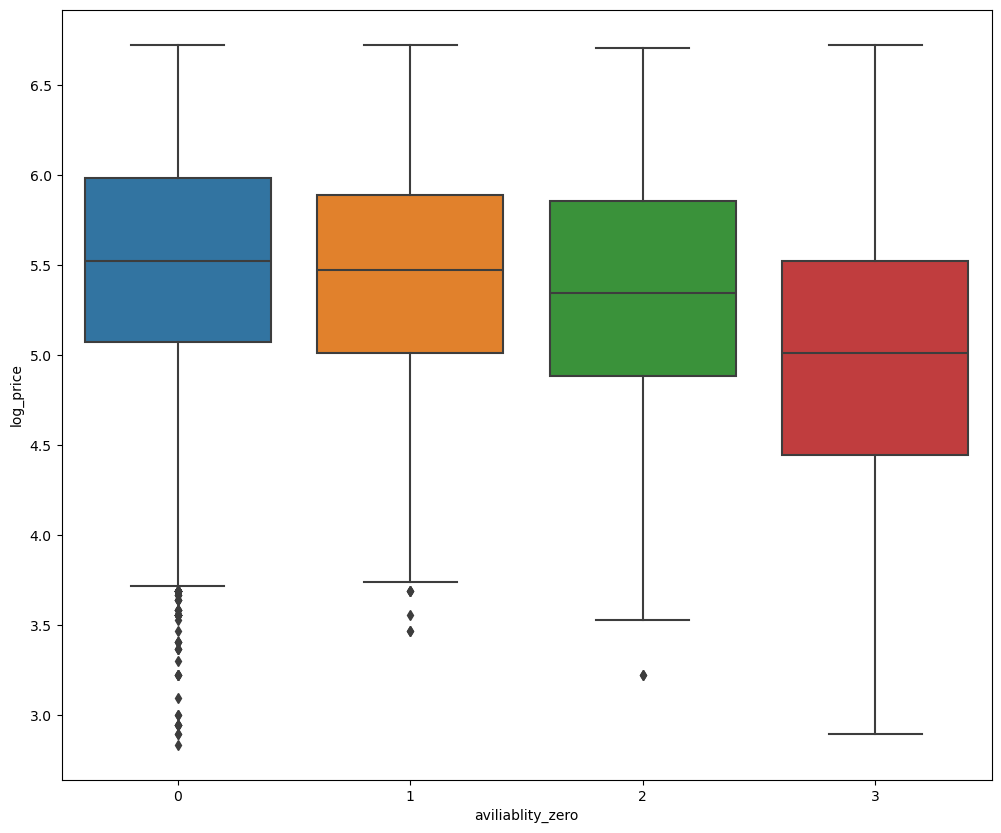

In [463]:
plt.figure(figsize=(12, 10))
# Access the 'train' DataFrame directly instead of through 'plot'
sns.boxplot(x=train['aviliablity_zero'], y = train['log_price'])
plt.xlabel('aviliablity_zero')
plt.ylabel('log_price')
plt.show()

In [464]:
#drop the 'availability_30','availability_60','availability_90'
train = train.drop(['availability_30','availability_60','availability_90'], axis=1)
test = test.drop(['availability_30','availability_60','availability_90'], axis=1)


### 2.3.2 Continous Predictor

#### 2.3.2.1 Continous Predictor

<Axes: xlabel='reviews_per_month'>

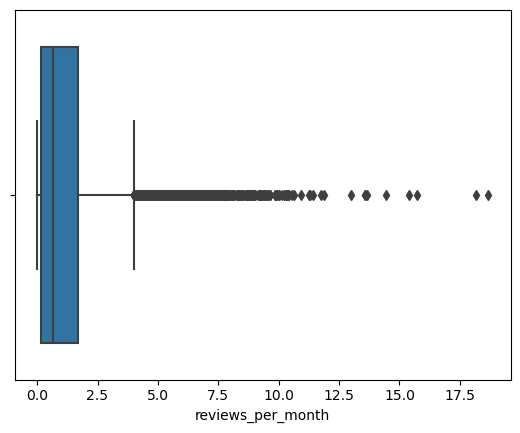

In [465]:
sns.boxplot(x=train['reviews_per_month'])

In [466]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 选择要进行相关性分析的列
selected_columns = ['host_response_rate', 'log_price']

# 检查 'reviews_per_month' 列是否存在并添加
if 'reviews_pre_month' in train.columns:
    selected_columns.append('reviews_pre_month')
elif 'reviews_per_month' in train.columns:
    selected_columns.append('reviews_per_month')
else:
    raise KeyError("Neither 'reviews_pre_month' nor 'reviews_per_month' found in the DataFrame.")

# 检查 'host_response_rate' 是否为数值型且包含有效数据
if train['host_response_rate'].dtype != 'object' and train['host_response_rate'].notna().any():
    # 计算相关性矩阵
    correlation_matrix = train[selected_columns].corr()

    # 使用 seaborn 绘制相关性矩阵的热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Warning: 'host_response_rate' is not suitable for correlation analysis. Skipping...")

#### 2.3.2.2 Fill Nan

In [467]:
from math import dist

data_trans_precentage = ['host_response_rate','host_acceptance_rate']




In [468]:
for col in data_trans_precentage:
    # Convert the column to string type before applying str operations if it is not of type object
    if train[col].dtype != 'object':
        train[col] = train[col].astype(str).str.rstrip('%').astype('float') / 100
    else:
        train[col] = train[col].str.rstrip('%').astype('float') / 100

    if test[col].dtype != 'object':
        test[col] = test[col].astype(str).str.rstrip('%').astype('float') / 100
    else:
        test[col] = test[col].str.rstrip('%').astype('float') / 100

In [469]:
mean_values = train[data_trans_precentage].mean()
# Fill missing values in the train and test sets
train[data_trans_precentage] = train[data_trans_precentage].fillna(mean_values)
test[data_trans_precentage] = test[data_trans_precentage].fillna(mean_values)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        26028 non-null  object 
 1   host_since                                    26028 non-null  object 
 2   host_location                                 19332 non-null  object 
 3   host_response_time                            17180 non-null  object 
 4   host_response_rate                            26028 non-null  float64
 5   host_acceptance_rate                          26028 non-null  float64
 6   host_is_superhost                             26008 non-null  object 
 7   host_listings_count                           26028 non-null  float64
 8   host_total_listings_count                     26028 non-null  float64
 9   host_verifications                            26028 non-n

In [470]:
import numpy as np
import pandas as pd

for col in data_trans_precentage:
    try:
        # Try to convert column to numeric and calculate the mean
        numeric_values = pd.to_numeric(train[col], errors='coerce')
        mean_value = numeric_values.mean()
        # Fill missing values in the train set with the mean
        train[col] = numeric_values.fillna(mean_value)
    except ValueError:
        # If conversion to numeric fails, this block is executed, though unlikely for numeric columns
        pass

# Create train-validation split to test the selected_colonm should take log or Yeo-Johnson
index_train, index_valid = train_test_split(train.index, train_size=0.8, random_state=42)

# Split the train DataFrame into training and validation samples
train_sample = train.loc[index_train, :].copy()
valid_sample = train.loc[index_valid, :].copy()

# Extract the target variable 'log_price' for both samples
y_train_sample = train_sample['log_price']
y_valid_sample = valid_sample['log_price']

# Print shapes of training and validation sets for 'log_price'
print(y_train_sample.shape, y_valid_sample.shape)


(20822,) (5206,)


#### 2.3.2.3 Yeo-Johnson transformation & log transformation

In [471]:
from sklearn.preprocessing import PowerTransformer


data_trans_precentage = ['host_response_rate','host_acceptance_rate']
data_trans_precentageYJ = ['host_response_rateYJ','host_acceptance_rateYJ']
data_trans_precentage_log = ['host_response_rate_log','host_acceptance_rate_log']


# YJ is the default, the method can also do the Box-Cox transformation
yj = PowerTransformer(method='yeo-johnson')

# Use the correct column names when selecting data for transformation
train_sample[data_trans_precentageYJ] = yj.fit_transform(train_sample[data_trans_precentage])
valid_sample[data_trans_precentageYJ] = yj.transform(valid_sample[data_trans_precentage])

train_sample[data_trans_precentage_log] = np.log(train_sample[data_trans_precentage])
valid_sample[data_trans_precentage_log] = np.log(valid_sample[data_trans_precentage])

/Users/morton/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/morton/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


####2.3.2.4 Comparing feature engineering strategies

In [472]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rows = ['No transformation', 'Yeo-Johnson transformation', 'Log']
columns = ['RMSE', 'R-Squared', 'MAE']
results = pd.DataFrame(0.0, columns=columns, index=rows)

for i in range(len(rows)):

    # Design matrices
    if i == 0:
        predictor = data_trans_precentage
    elif i == 1:
        predictor = data_trans_precentageYJ
    elif i == 2:
        predictor = data_trans_precentage_log

    X_train = train_sample[predictor]
    X_valid = valid_sample[predictor]

    # Fix: Replace infinite values with a large number or remove rows with infinite values
    X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()  # Replace inf with NaN and drop rows with NaN
    X_valid = X_valid.replace([np.inf, -np.inf], np.nan).dropna()  # Replace inf with NaN and drop rows with NaN

    # Fix: Ensure y_train_sample and y_valid_sample are aligned with X_train and X_valid after dropping rows
    y_train_sample_filtered = y_train_sample[X_train.index]  # Filter y_train_sample to match X_train index
    y_valid_sample_filtered = y_valid_sample[X_valid.index]  # Filter y_valid_sample to match X_valid index

    # Fit model
    ols = LinearRegression().fit(X_train, y_train_sample_filtered)  # Use the filtered y_train_sample

    # Validation set predictions
    y_pred = ols.predict(X_valid)

    # Validation metrics
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_valid_sample_filtered, y_pred))  # Use the filtered y_valid_sample
    results.iloc[i, 1] = r2_score(y_valid_sample_filtered, y_pred)  # Use the filtered y_valid_sample
    results.iloc[i, 2] = mean_absolute_error(y_valid_sample_filtered, y_pred)  # Use the filtered y_valid_sample

results.round(3)

,RMSE,R-Squared,MAE
No transformation,0.729,0.011,0.588
Yeo-Johnson transformation,0.716,0.044,0.578
Log,0.723,0.002,0.583


In [473]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# PowerTransformer with Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for column in data_trans_precentage:
    # Calculate the mean from the train data
    mean_value_train = train[column].mean()

    # Fill missing values in train data with the train mean
    train[column] = train[column].fillna(mean_value_train)

    # Fill missing values in test data with the train mean (using train mean)
    test[column] = test[column].fillna(mean_value_train)

# Apply Yeo-Johnson transformation after filling missing values
# fit_transform on train data, transform on test data (use train parameters)
train[data_trans_precentageYJ] = pt.fit_transform(train[data_trans_precentage])
test[data_trans_precentageYJ] = pt.transform(test[data_trans_precentage])

# Drop unwanted columns
train.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)
test.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)



In [474]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        26028 non-null  object 
 1   host_since                                    26028 non-null  object 
 2   host_location                                 19332 non-null  object 
 3   host_response_time                            17180 non-null  object 
 4   host_is_superhost                             26008 non-null  object 
 5   host_listings_count                           26028 non-null  float64
 6   host_total_listings_count                     26028 non-null  float64
 7   host_verifications                            26028 non-null  object 
 8   host_has_profile_pic                          26028 non-null  object 
 9   host_identity_verified                        26028 non-n

<Axes: xlabel='reviews_per_month'>

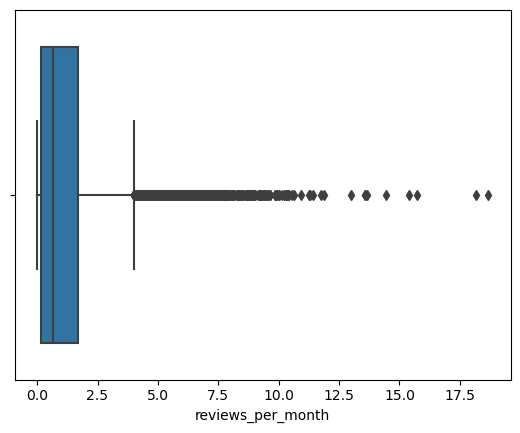

In [475]:
sns.boxplot(x=train['reviews_per_month'])

In [476]:
# fill na with 0 of reviews_per_month
train['reviews_per_month'].fillna(0, inplace=True)
test['reviews_per_month'].fillna(0, inplace=True)

###2.3.3 Nominal Predictors

#### 2.3.3.1 EDA of Nominal Predictor

In [477]:
#neighbourhood_cleansed
location_related = ['host_location','neighbourhood','neighbourhood_cleansed']
train[location_related]
#since they present same information, host_location and neighbourhood can be dropped


,host_location,neighbourhood,neighbourhood_cleansed
37256,"New South Wales, Australia",NaN,North Sydney
36599,"Kingscliff, Australia",NaN,TWEED SHIRE COUNCIL
6322,NaN,NaN,Randwick
22800,"Palm Beach, Australia","Palm Beach, New South Wales, Australia",Pittwater
29953,"South Coogee, Australia","Coogee, New South Wales, Australia",Randwick
...,...,...,...
34464,"Sydney, Australia","Millers Point, New South Wales, Australia",Sydney
6246,"Mount Annan, Australia","Mount Annan, New South Wales, Australia",Camden
976,"Randwick, Australia",NaN,Randwick
18266,"Yamba, Australia",NaN,CLARENCE VALLEY COUNCIL


In [478]:
# List of columns that are considered duplicated or redundant
duplicated_location = ['host_location','neighbourhood']
# Drop the same duplicated columns from the train and test dataset
train.drop(duplicated_location, axis=1, inplace=True)
test.drop(duplicated_location, axis=1, inplace=True)


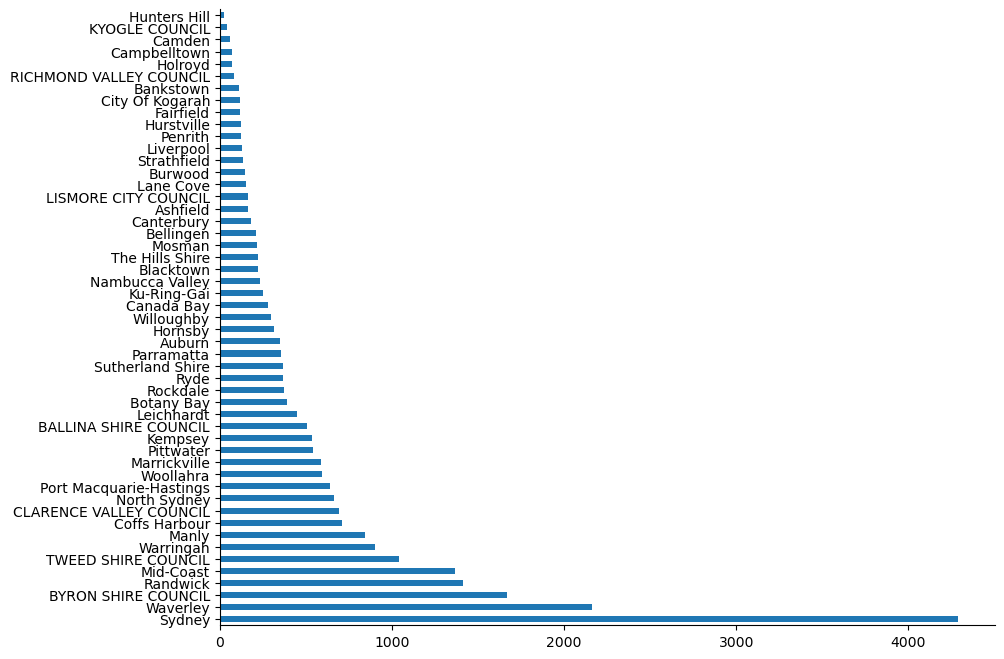

In [479]:
import matplotlib.pyplot as plt
import seaborn as sns

# 画图代码
plt.figure(figsize=(10, 8))
train['neighbourhood_cleansed'].value_counts().plot(kind='barh')
sns.despine()
plt.show()

#### 2.3.3.2 Catagorial Encoding

In [480]:
# Define the variable you are working with
variable = 'neighbourhood_cleansed'

# Get the value counts for each level in the 'neighbourhood_cleansed' column
# This gives you a count of how many times each level (or category) appears
counts = train[variable].value_counts()

# Loop over each level in the value counts index (i.e., each unique value in the column)
for level in counts.index:

    # If the count of the current level is less than 100, replace it with 'Other'
    if counts[level] < 100:
        # Update the 'neighbourhood_cleansed' column in the train dataset
        # Wherever the value matches the current level, it's replaced with 'Other'
        train.loc[train[variable] == level, variable] = 'Other'

        # Similarly, update the 'neighbourhood_cleansed' column in the test dataset
        test.loc[test[variable] == level, variable] = 'Other'



In [481]:
print(train['neighbourhood_cleansed'].value_counts().reset_index())
print(test['neighbourhood_cleansed'].value_counts().reset_index())

                      index  neighbourhood_cleansed
0                    Sydney                    4288
1                  Waverley                    2163
2       BYRON SHIRE COUNCIL                    1669
3                  Randwick                    1410
4                 Mid-Coast                    1365
5       TWEED SHIRE COUNCIL                    1042
6                 Warringah                     903
7                     Manly                     841
8             Coffs Harbour                     709
9   CLARENCE VALLEY COUNCIL                     695
10             North Sydney                     662
11  Port Macquarie-Hastings                     639
12                Woollahra                     591
13             Marrickville                     589
14                Pittwater                     544
15                  Kempsey                     533
16    BALLINA SHIRE COUNCIL                     509
17               Leichhardt                     446
18          

 neighborhood_overview                         16893 non-null  object
 2   host_since                                    30106 non-null  object
 3   host_location                                 22284 non-null  object
 4   host_response_time                            19467 non-null  object
 5   host_response_rate                            19467 non-null  object
 6   host_acceptance_rate                          20258 non-null  object
 bathrooms_text                                30094 non-null  object
 19  beds                                          29736 non-null  float64
 20  price                                         28522 non-null  float64
 has_availability                              28522 non-null  object
 first_review                                  22667 non-null  object
 39  last_review                                   22667 non-null  object
 40  review_scores_rating                          22687 non-null  float64
 41  review_scores_accuracy                        22673 non-null  float64
 42  review_scores_cleanliness                     22680 non-null  float64
 43  review_scores_checkin                         22667 non-null  float64
 44  review_scores_communication                   22681 non-null  float64
 45  review_scores_location                        22668 non-null  float64
 46  review_scores_value                           22666 non-null  float64
 47  license                                       21207 non-null  object
 reviews_per_month                             22667 non-null  float64
 54  log_price                                     28522 non-null  float64

In [482]:
from category_encoders.target_encoder import TargetEncoder
y_train = train['price'].to_numpy()

encoder = TargetEncoder().fit(train['neighbourhood_cleansed'], y_train) # we must use the training set for this
train['neighbourhood_cleansed'] = encoder.transform(train['neighbourhood_cleansed'])
test['neighbourhood_cleansed'] = encoder.transform(test['neighbourhood_cleansed'])


####2.3.3.3 Dummy Encoded

In [483]:
# Modify the 'property_type' column in the train dataset
train['property_type'] = train['property_type'].apply(lambda x:x.split()[-1])
test['property_type'] = test['property_type'].apply(lambda x:x.split()[-1])

df_property = train['property_type'].value_counts().reset_index()
# Display the DataFrame
df_property

,index,property_type
0,unit,12408
1,home,8066
2,suite,887
3,townhouse,846
4,guesthouse,772
5,condo,565
6,cottage,367
7,apartment,326
8,hotel,316
9,villa,267


In [484]:
# Get the value counts for the 'property_type' column in the train dataset
counts = train['property_type'].value_counts()
for level in counts.index:
    #If the count of the current property type is less than 100, group it as 'Other'
    if counts[level] < 100:
        train.loc[train['property_type']==level, 'property_type'] = 'Other'
        test.loc[test['property_type']==level, 'property_type'] = 'Other'

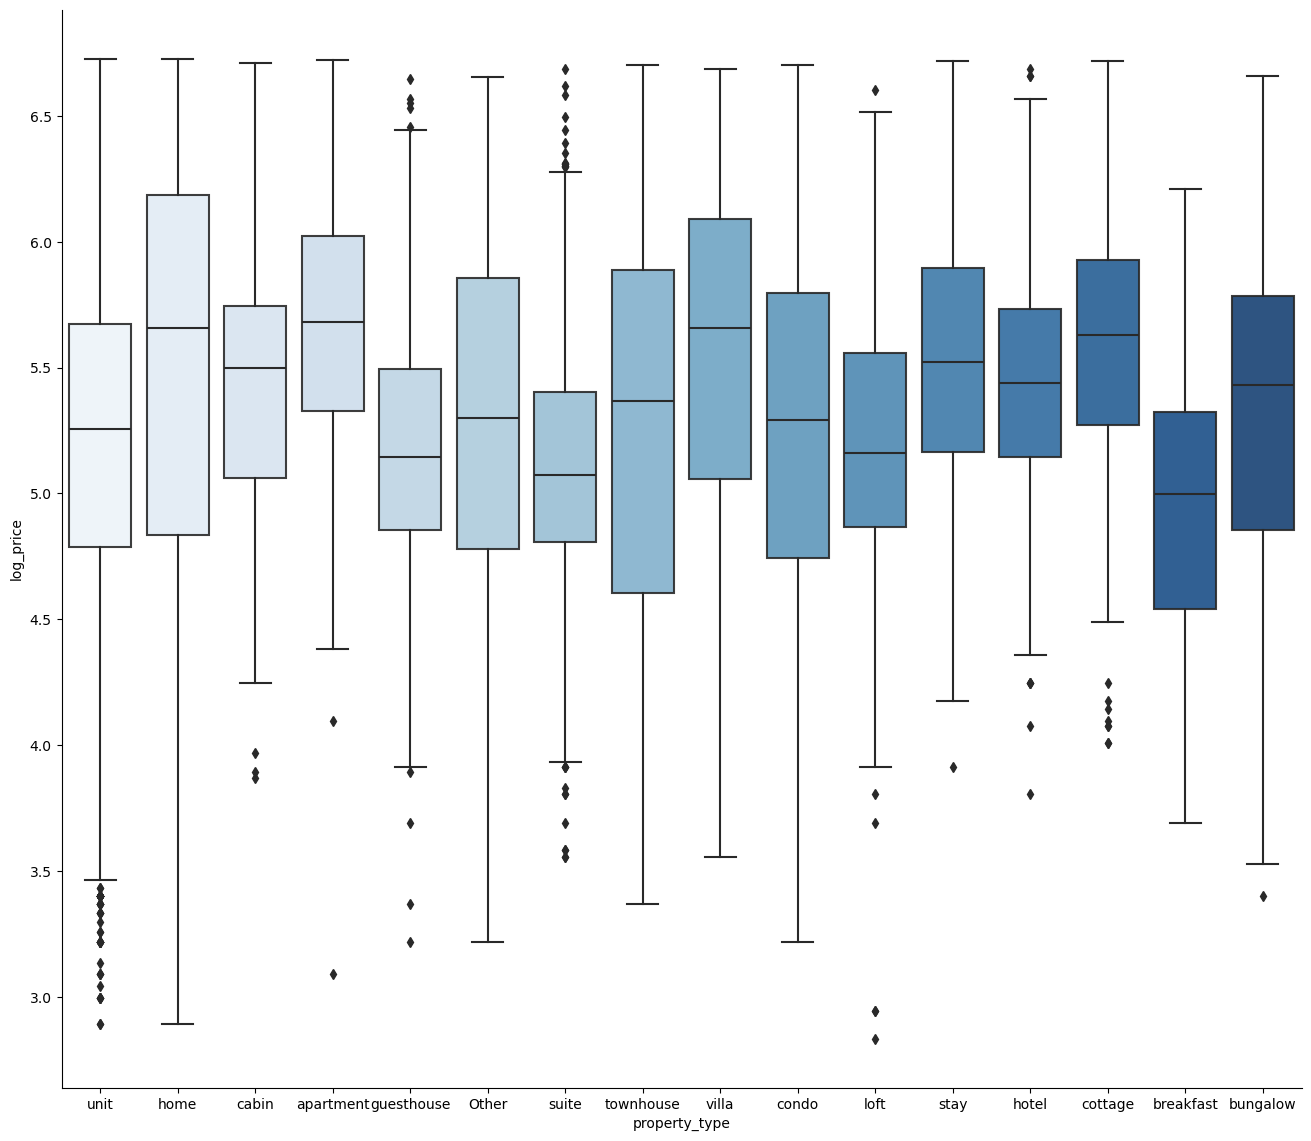

In [485]:
plt.figure(figsize=(16, 14))
sns.boxplot(x = train['property_type'], y = train['log_price'], boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

In [486]:
#fill the Na with Unkonwn in host_response_time
train['host_response_time'] = train['host_response_time'].fillna('Unknown')
test['host_response_time'] = test['host_response_time'].fillna('Unknown')

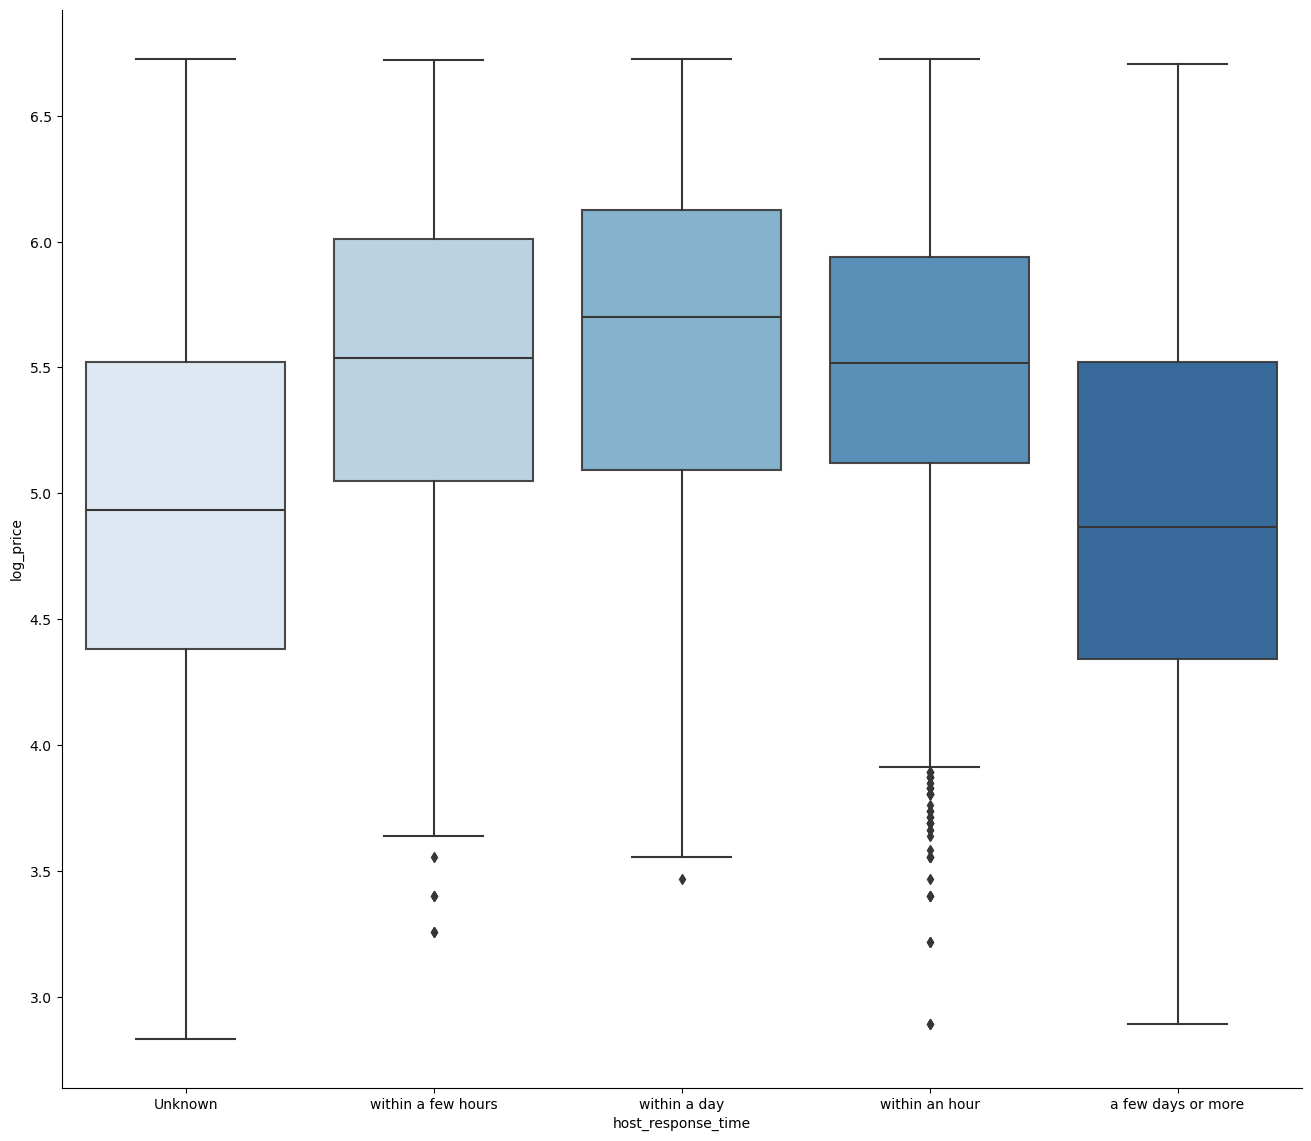

In [487]:
plt.figure(figsize=(16, 14))
sns.boxplot(x = train['host_response_time'], y = train['log_price'], boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

In [488]:
#encoding the different host_response_time to 0-4
key = {
    'Unknown': 0,
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4

}
train['host_response_time'] = train['host_response_time'].map(key)
test['host_response_time'] = test['host_response_time'].map(key)

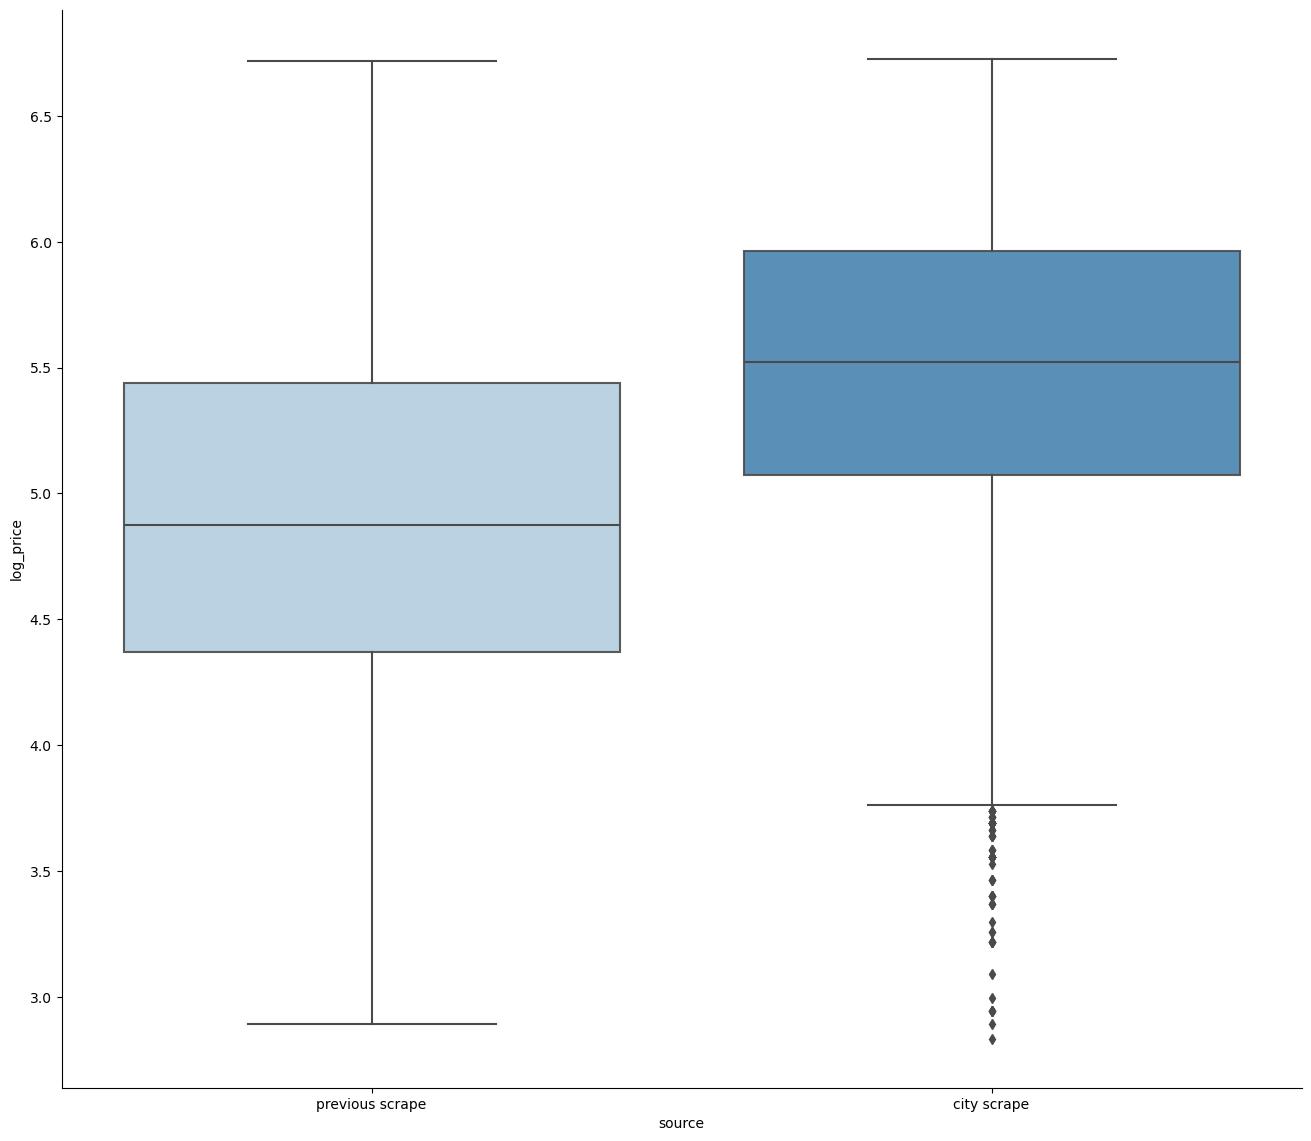

In [489]:
# using the boxplot to check the source's relationship with log_price
plt.figure(figsize=(16, 14))
sns.boxplot(x = train['source'], y = train['log_price'], boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

In [490]:
import pandas as pd

# Convert the 'host_verifications' column from a string representation of a list to an actual list using eval()
train['host_verifications'] = train['host_verifications'].apply(eval)

# Initialize an empty set to store all unique verification methods across all rows
all_verifications = set()

# Loop through each list of verifications in the train dataset and add each unique verification method to the set
for verifications in train['host_verifications']:
    all_verifications.update(verifications)

# Now, create new binary columns for each unique verification method in the train dataset
for verification in all_verifications:
    train[f'verification_{verification}'] = train['host_verifications'].apply(lambda x: 1 if verification in x else 0)

# Apply the same process for the test dataset

test['host_verifications'] = test['host_verifications'].apply(eval)
all_verifications = set()
for verifications in test['host_verifications']:
    all_verifications.update(verifications)
for verification in all_verifications:
    test[f'verification_{verification}'] = test['host_verifications'].apply(lambda x: 1 if verification in x else 0)


In [491]:
import numpy as np
import pandas as pd

# List of columns to process
columns_to_process = ['host_is_superhost', 'host_has_profile_pic',
                      'host_identity_verified', 'has_availability','instant_bookable','property_type',
                      'source']
for column in columns_to_process:
    # calculate mode
    mode_value = train[column].mode()[0]

    # fillna with mode
    train[column] = train[column].fillna(mode_value)
    test[column] = test[column].fillna(mode_value)

In [492]:
dummies_train = pd.get_dummies(train[columns_to_process],  prefix = columns_to_process, drop_first=True)
# Create dummies_test using the test DataFrame instead of train
dummies_test= pd.get_dummies(test[columns_to_process],  prefix = columns_to_process, drop_first=True)
train = train.join(dummies_train) # Join directly, assuming index_train is the same as train's index
# Join directly, assuming index_valid is the same as test's index
test = test.join(dummies_test)

train.drop(columns_to_process, axis=1, inplace=True)
test.drop(columns_to_process, axis=1, inplace=True)
test.drop('room_type', axis=1, inplace=True)
train.drop('room_type', axis=1, inplace=True)
train.drop('price', axis=1, inplace=True)
test.drop('price', axis=1, inplace=True)

In [493]:
import pandas as pd

# Assuming 'host_verifications' contains lists of strings
def explode_and_dummies(df, column_name):
    """Explodes a column containing lists and creates dummy variables."""
    # 1. Explode the list column:
    exploded_df = df.explode(column_name)

    # 2. Create dummy variables:
    dummies = pd.get_dummies(exploded_df[column_name], prefix=column_name, prefix_sep='_', drop_first=True)

    # 3. Group by original index and aggregate dummy columns:
    dummies_aggregated = dummies.groupby(exploded_df.index).max()

    # 4. Join the dummy columns back to the original DataFrame:
    result_df = df.join(dummies_aggregated)

    # 5. Drop the original list column:
    result_df.drop(columns=[column_name], inplace=True)

    return result_df

# Apply the function to both train and test DataFrames:
train = explode_and_dummies(train, 'host_verifications')
test = explode_and_dummies(test, 'host_verifications')

# Now handle 'number_of_reviews' separately as it's not a list:
columns_to_process1 = ['number_of_reviews']
dummies_train1 = pd.get_dummies(train[columns_to_process1], prefix=columns_to_process1, drop_first=True)
dummies_test1 = pd.get_dummies(test[columns_to_process1], prefix=columns_to_process1, drop_first=True)
train = train.join(dummies_train1)
test = test.join(dummies_test1)

In [494]:
test.drop('number_of_reviews', axis=1, inplace=True)
train.drop('number_of_reviews', axis=1, inplace=True)

### 2.3.4 Ordinal Predictor

#### 2.3.4.1 Ordinal Predictor EDA

```
# This is formatted as code
```



In [495]:
import pandas as pd

for feature in features_date:
    # Attempt to infer the datetime format automatically, handling errors gracefully
    try:
        train[feature] = pd.to_datetime(train[feature], infer_datetime_format=True, errors='coerce')
        test[feature] = pd.to_datetime(test[feature], infer_datetime_format=True, errors='coerce')
    except ValueError:
        # If inference fails, print a warning and leave the column unchanged
        print(f"Warning: Failed to convert '{feature}' to datetime. Please check the format.")

print(train[features_date].dtypes) # Corrected typo: tpye() -> dtypes
print(train[features_date].info())

calendar_last_scraped    datetime64[ns]
host_since               datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 37256 to 27366
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   calendar_last_scraped  26028 non-null  datetime64[ns]
 1   host_since             26028 non-null  datetime64[ns]
 2   first_review           20233 non-null  datetime64[ns]
 3   last_review            20233 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.0 MB
None


take out the bathrooms number as flot

Feature engineering


In [496]:
ordinal_data_with_missing = ['host_response_time','review_scores_rating',
                                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                                ,'review_scores_communication','review_scores_location','review_scores_value']

#### 2.3.3.2 Review_Scores

In [497]:
col_review = [ 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
              ,'review_scores_communication','review_scores_location','review_scores_value']
train[col_review]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
37256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6322,5.00,5.00,5.00,5.00,5.00,5.00,5.00
22800,4.90,4.93,4.93,5.00,4.90,4.97,4.37
29953,4.93,5.00,4.93,5.00,4.93,5.00,4.87
...,...,...,...,...,...,...,...
34464,4.95,4.97,4.97,5.00,5.00,5.00,4.85
6246,4.81,4.87,4.87,4.94,5.00,4.94,4.71
976,5.00,5.00,4.00,5.00,5.00,4.00,5.00
18266,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [498]:
#encoding the review_rating to wider range
def review_rating(x):
  if x == np.nan:
    return 0
  elif x > 4.5:
    return 3
  elif x > 4:
    return 2
  else:
    return 1

for col in col_review:
  train[col] = train[col].apply(review_rating)
  test[col] = test[col].apply(review_rating)

In [499]:
train[col_review]
test[col_review]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
4215,2,3,3,3,2,3,3
29283,2,3,2,3,3,3,3
10894,3,3,3,2,3,3,3
20709,2,3,2,2,3,3,2
6024,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
9529,1,1,1,1,1,1,1
35358,3,3,3,3,3,3,1
6386,3,3,2,3,3,2,2
27589,3,3,3,3,3,3,3


### 2.3.5 Date EDA

In [500]:
date = ['host_since','calendar_last_scraped','first_review','last_review']
data_diff = ['host_since_year_diff','calendar_last_scraped_diff']

In [501]:
# calculate the year diff
for col in date:
  train['host_since_year_diff'] = 2024 - train['host_since'].dt.year
  test['host_since_year_diff'] = 2024 - test['host_since'].dt.year


print(train[['host_since', 'host_since_year_diff']].head())

      host_since  host_since_year_diff
37256 2016-07-29                     8
36599 2017-10-04                     7
6322  2017-11-07                     7
22800 2016-10-20                     8
29953 2014-10-18                    10


In [502]:
train.drop(['host_since'], axis=1, inplace=True)
test.drop(['host_since'], axis=1, inplace=True)

In [503]:
mean_values = train['host_since_year_diff'].mean()
train['host_since_year_diff'] = train['host_since_year_diff'].fillna(mean_values)
test['host_since_year_diff'] = test['host_since_year_diff'].fillna(mean_values)

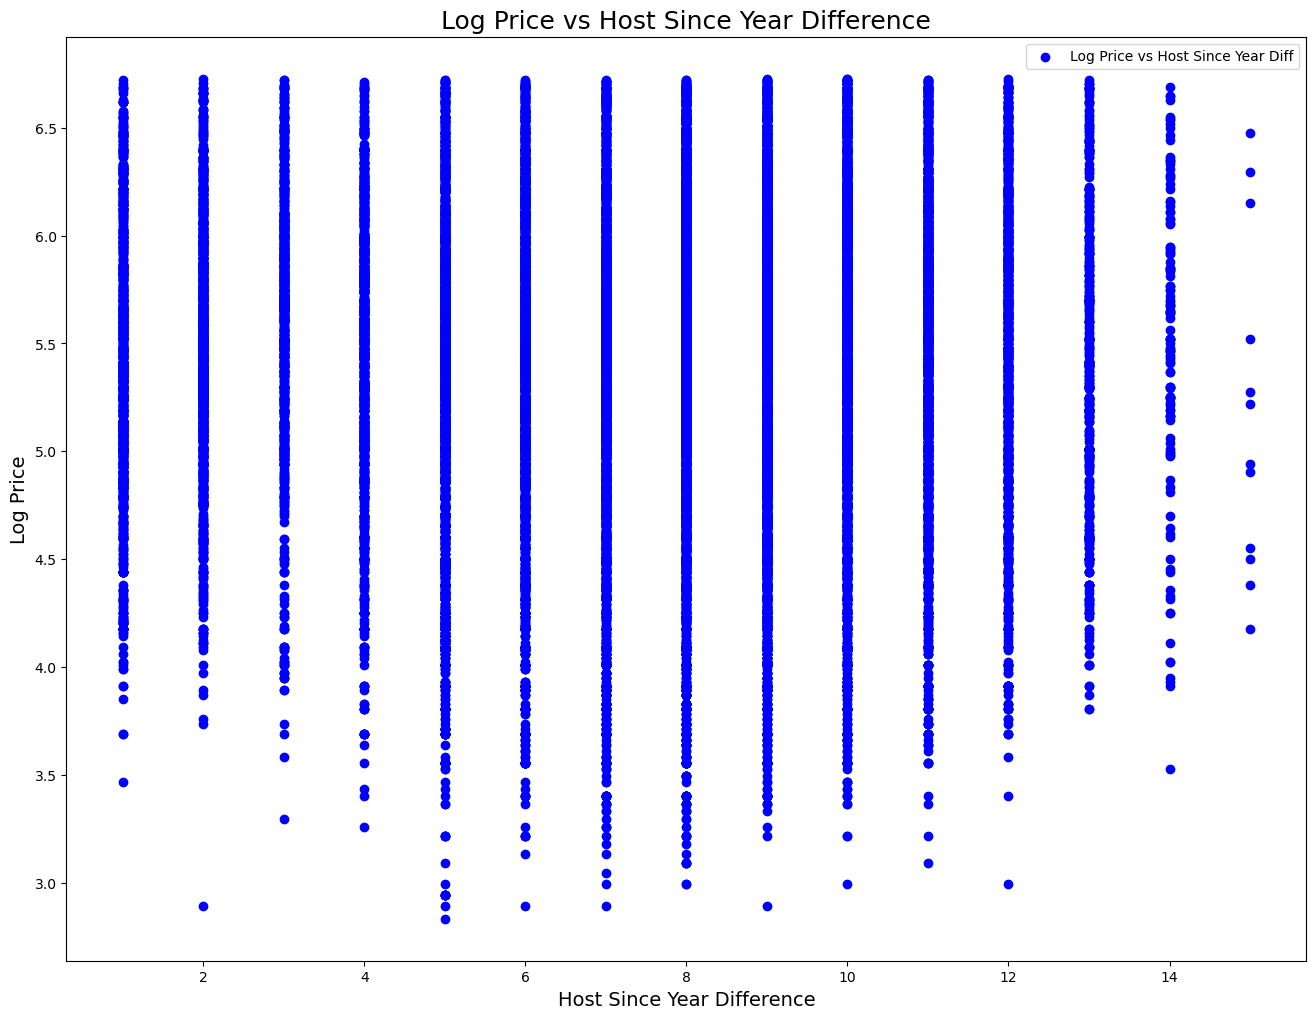

In [504]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.figure(figsize=(16, 12))
plt.scatter(train['host_since_year_diff'], train['log_price'], color='blue', label='Log Price vs Host Since Year Diff')

# 设置标题和标签
plt.title('Log Price vs Host Since Year Difference', fontsize=18)
plt.xlabel('Host Since Year Difference', fontsize=14)
plt.ylabel('Log Price', fontsize=14)

# 显示图例
plt.legend()

# 显示图表
plt.show()

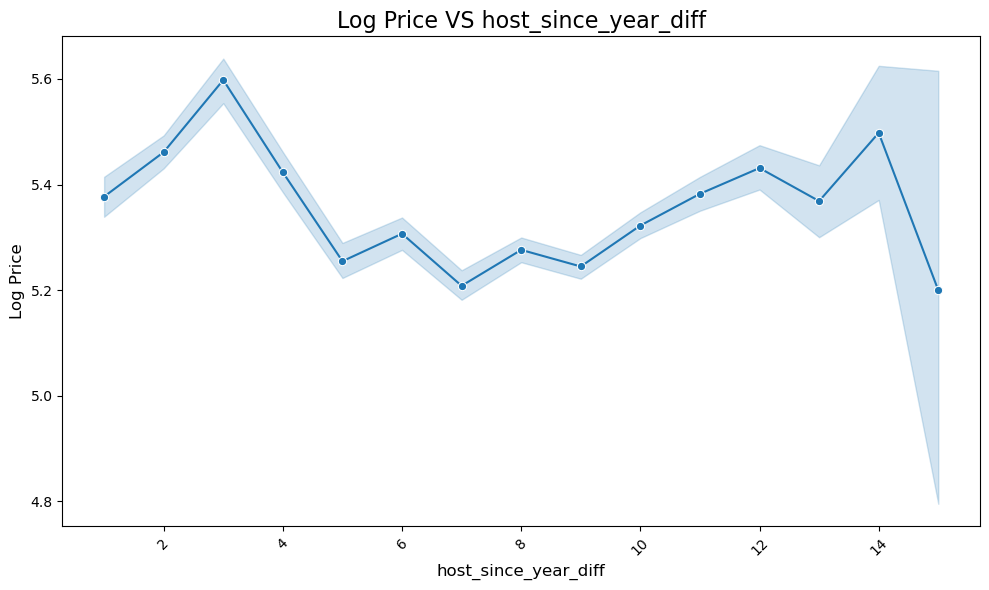

In [505]:
train.sort_values(by='host_since_year_diff', inplace=True)

# Set up the figure and axis for the line plot
plt.figure(figsize=(10, 6))

# Plot 'log_price' against 'calendar_last_scraped' using seaborn lineplot
sns.lineplot(x='host_since_year_diff', y='log_price', data=train, marker='o')

# Adding titles and labels
plt.title('Log Price VS host_since_year_diff', fontsize=16)
plt.xlabel('host_since_year_diff', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

# Rotate the x-axis labels if needed (depending on the time span)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [506]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 27366 to 3819
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_response_time                            26028 non-null  int64         
 1   host_listings_count                           26028 non-null  float64       
 2   host_total_listings_count                     26028 non-null  float64       
 3   neighbourhood_cleansed                        26028 non-null  float64       
 4   accommodates                                  26028 non-null  int64         
 5   beds                                          26028 non-null  float64       
 6   minimum_nights                                26028 non-null  int64         
 7   maximum_nights                                26028 non-null  int64         
 8   minimum_minimum_nights                        26028 non-null  i

In [507]:
train.drop(['calendar_last_scraped','first_review','last_review'], axis=1, inplace=True)
test.drop(['calendar_last_scraped','first_review','last_review'], axis=1, inplace=True)

In [508]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 4215 to 33577
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            6508 non-null   int64  
 1   host_listings_count                           6508 non-null   float64
 2   host_total_listings_count                     6508 non-null   float64
 3   neighbourhood_cleansed                        6508 non-null   float64
 4   accommodates                                  6508 non-null   int64  
 5   beds                                          6508 non-null   float64
 6   minimum_nights                                6508 non-null   int64  
 7   maximum_nights                                6508 non-null   int64  
 8   minimum_minimum_nights                        6508 non-null   int64  
 9   maximum_minimum_nights                        6508 non-null

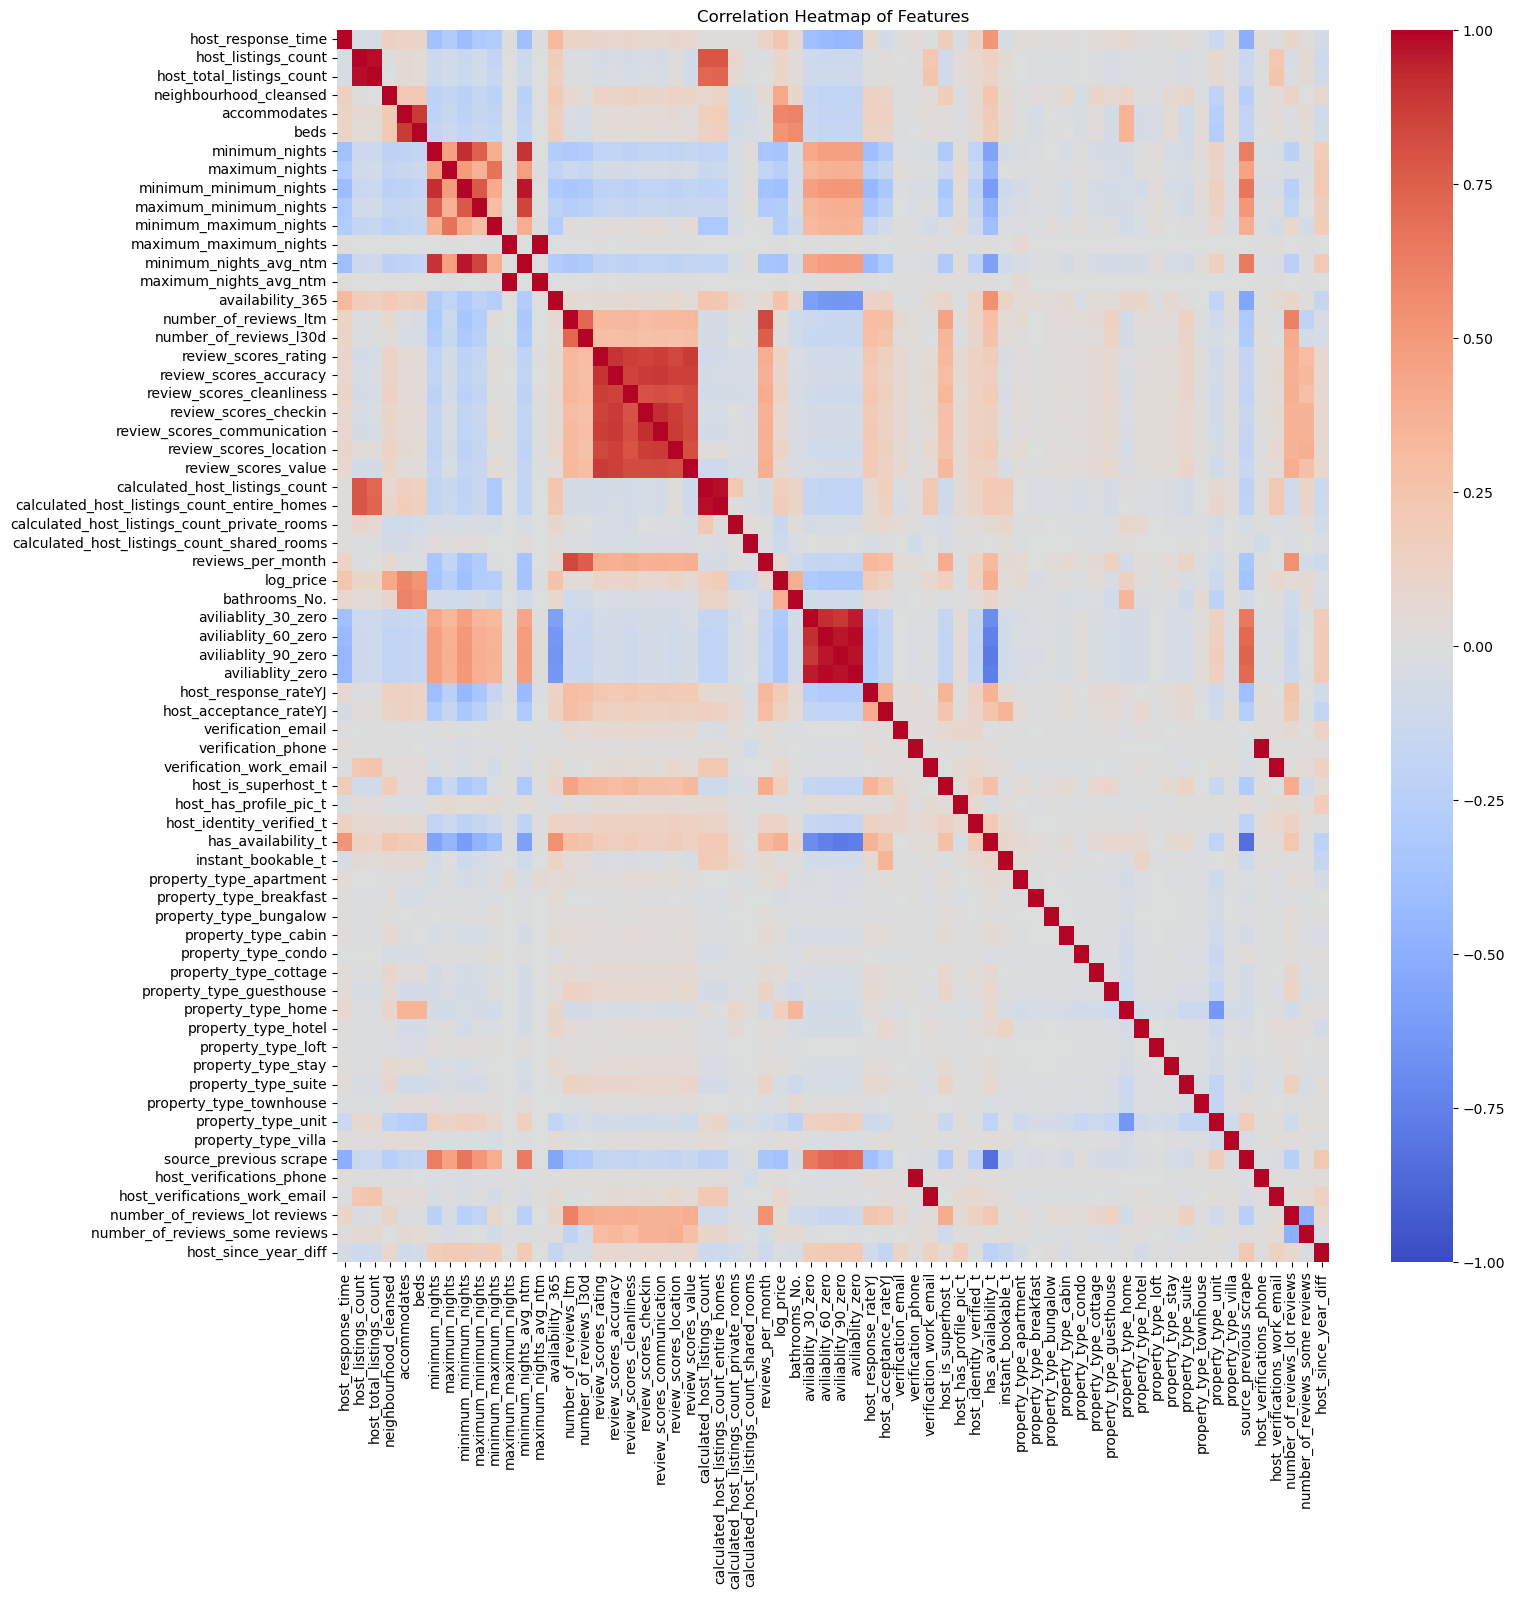

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the numeric columns in the train DataFrame
corr_matrix = train.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Set plot title and display the heatmap
plt.title('Correlation Heatmap of Features')
plt.show()


In [510]:
# 检查 NaN 值
print(train.isna().sum())

# 检查 Inf 值
print(np.isinf(train).sum())

# 替换 Inf 和 -Inf 为 NaN，然后处理 NaN（填补或删除）
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

host_response_time                0
host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
accommodates                      0
                                 ..
host_verifications_phone          0
host_verifications_work_email     0
number_of_reviews_lot reviews     0
number_of_reviews_some reviews    0
host_since_year_diff              0
Length: 66, dtype: int64
host_response_time                0
host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
accommodates                      0
                                 ..
host_verifications_phone          0
host_verifications_work_email     0
number_of_reviews_lot reviews     0
number_of_reviews_some reviews    0
host_since_year_diff              0
Length: 66, dtype: int64


# 3.Modeling

##Model 1

In [511]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [512]:
# X is the feature matrix, which consists of all columns in the train dataset except 'log_price'
X = train.drop('log_price', axis=1)

# y is the target variable, which is the 'log_price' column
y = train['log_price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26028 entries, 27366 to 3819
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            26028 non-null  int64  
 1   host_listings_count                           26028 non-null  float64
 2   host_total_listings_count                     26028 non-null  float64
 3   neighbourhood_cleansed                        26028 non-null  float64
 4   accommodates                                  26028 non-null  int64  
 5   beds                                          26028 non-null  float64
 6   minimum_nights                                26028 non-null  int64  
 7   maximum_nights                                26028 non-null  int64  
 8   minimum_minimum_nights                        26028 non-null  int64  
 9   maximum_minimum_nights                        26028 non-nu

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20822 entries, 13096 to 12182
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            20822 non-null  int64  
 1   host_listings_count                           20822 non-null  float64
 2   host_total_listings_count                     20822 non-null  float64
 3   neighbourhood_cleansed                        20822 non-null  float64
 4   accommodates                                  20822 non-null  int64  
 5   beds                                          20822 non-null  float64
 6   minimum_nights                                20822 non-null  int64  
 7   maximum_nights                                20822 non-null  int64  
 8   minimum_minimum_nights                        20822 non-null  int64  
 9   maximum_minimum_nights                        20822 non-n

In [514]:
# Data processing on training set
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection - Selecting top features based on Random Forest importance
rf_model_temp = RandomForestRegressor(random_state=42)
rf_model_temp.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_model_temp.feature_importances_, index=X_train.columns)
important_features = list(feature_importances.nlargest(3).index)
X_train_selected = X_train_scaled[:, [X_train.columns.get_loc(c) for c in important_features]]
X_test_selected = X_test_scaled[:, [X_train.columns.get_loc(c) for c in important_features]]

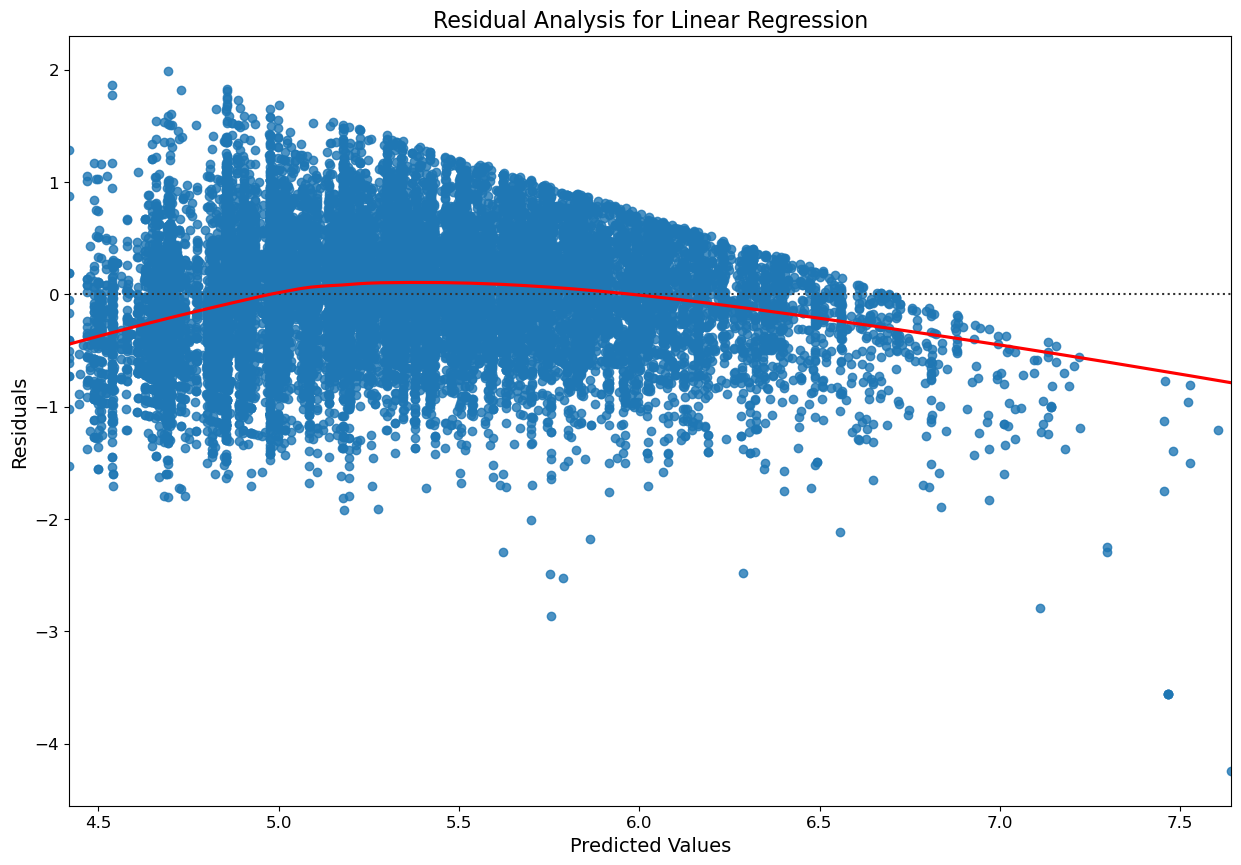

In [516]:
# 1. Linear Regression Model（benchmark model）
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Residual analysis
y_pred_train = linear_model.predict(X_train_selected)
residuals = y_train - y_pred_train

plt.figure(figsize=(15, 10))
sns.residplot(x=y_pred_train, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Analysis for Linear Regression', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [517]:
# 2. Random Forest Model with Cross-Validation and Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_selected, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Random Forest: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}


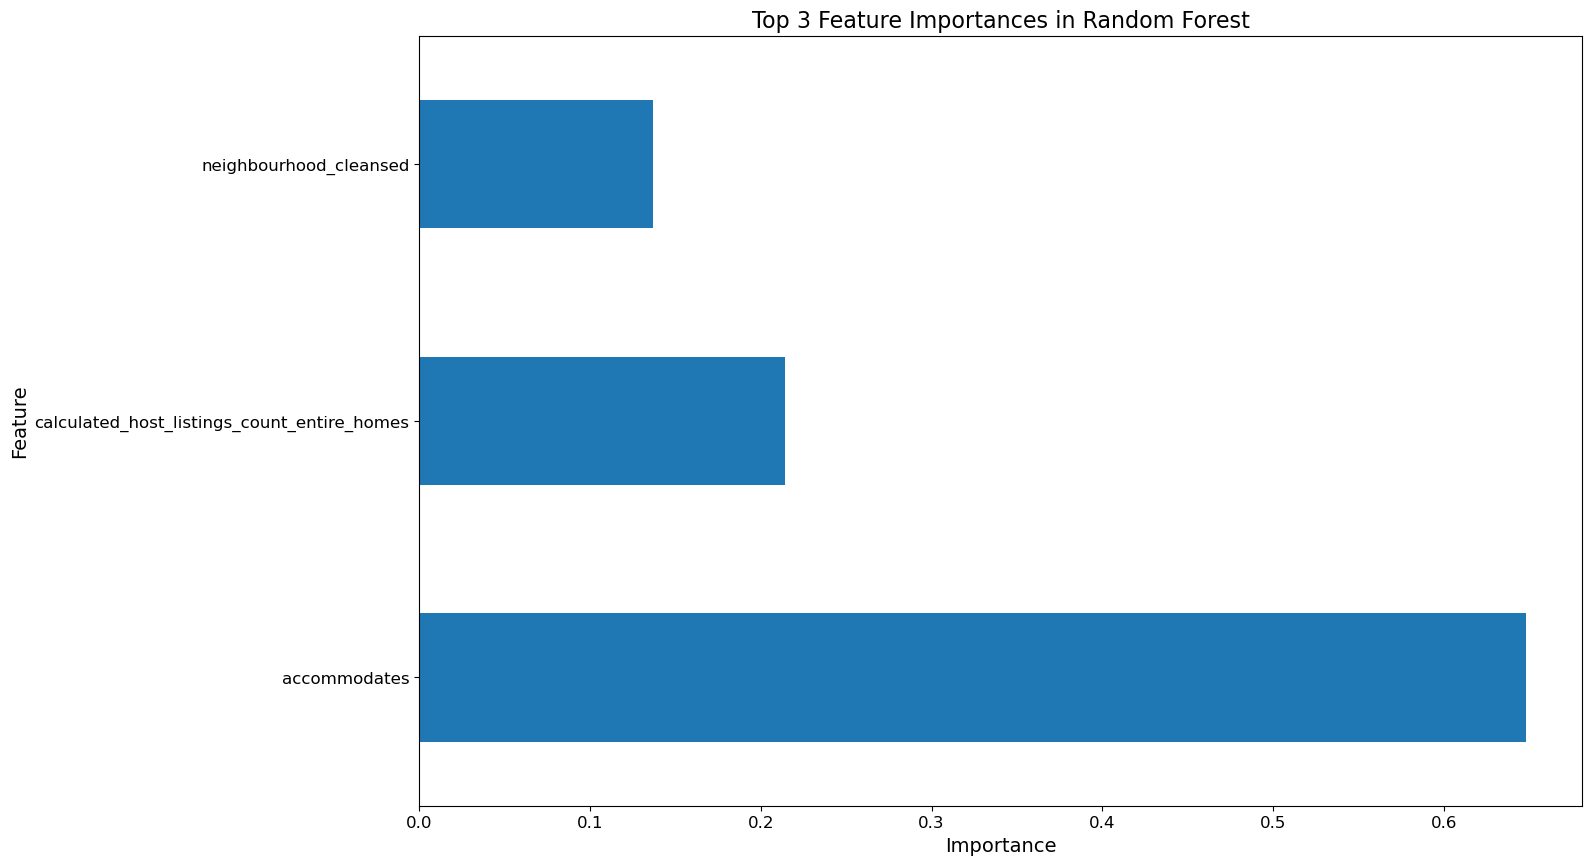

In [518]:
# Feature importance plot
feature_importances = pd.Series(best_rf_model.feature_importances_, index=important_features)
feature_importances.nlargest(3).plot(kind='barh', figsize=(15, 10))
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Top 3 Feature Importances in Random Forest', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [519]:
# 3. Gradient Boosting Model with Cross-Validation and Hyperparameter Tuning
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_selected, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


<Figure size 1500x1000 with 0 Axes>

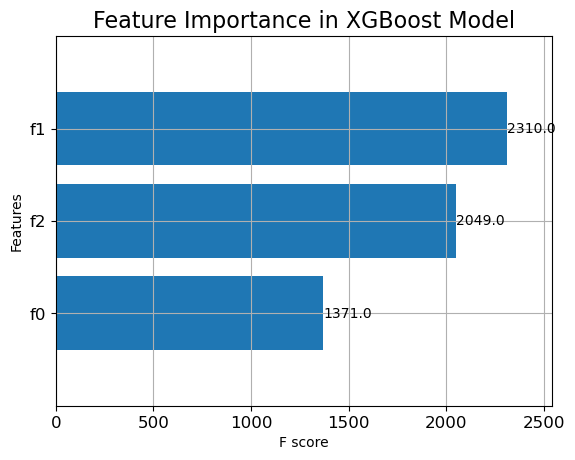

In [520]:
# Feature importance plot for XGBoost
plt.figure(figsize=(15, 10))
xgb.plot_importance(best_xgb_model, max_num_features=3, importance_type='weight', height=0.8)
plt.title('Feature Importance in XGBoost Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [521]:
# 4. Lasso Regression with Cross-Validation for Hyperparameter Tuning
lasso_model = Lasso(random_state=42)
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_selected, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
print(f"Best Parameters for Lasso Regression: {grid_search_lasso.best_params_}")

Best Parameters for Lasso Regression: {'alpha': 0.01}


Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7}


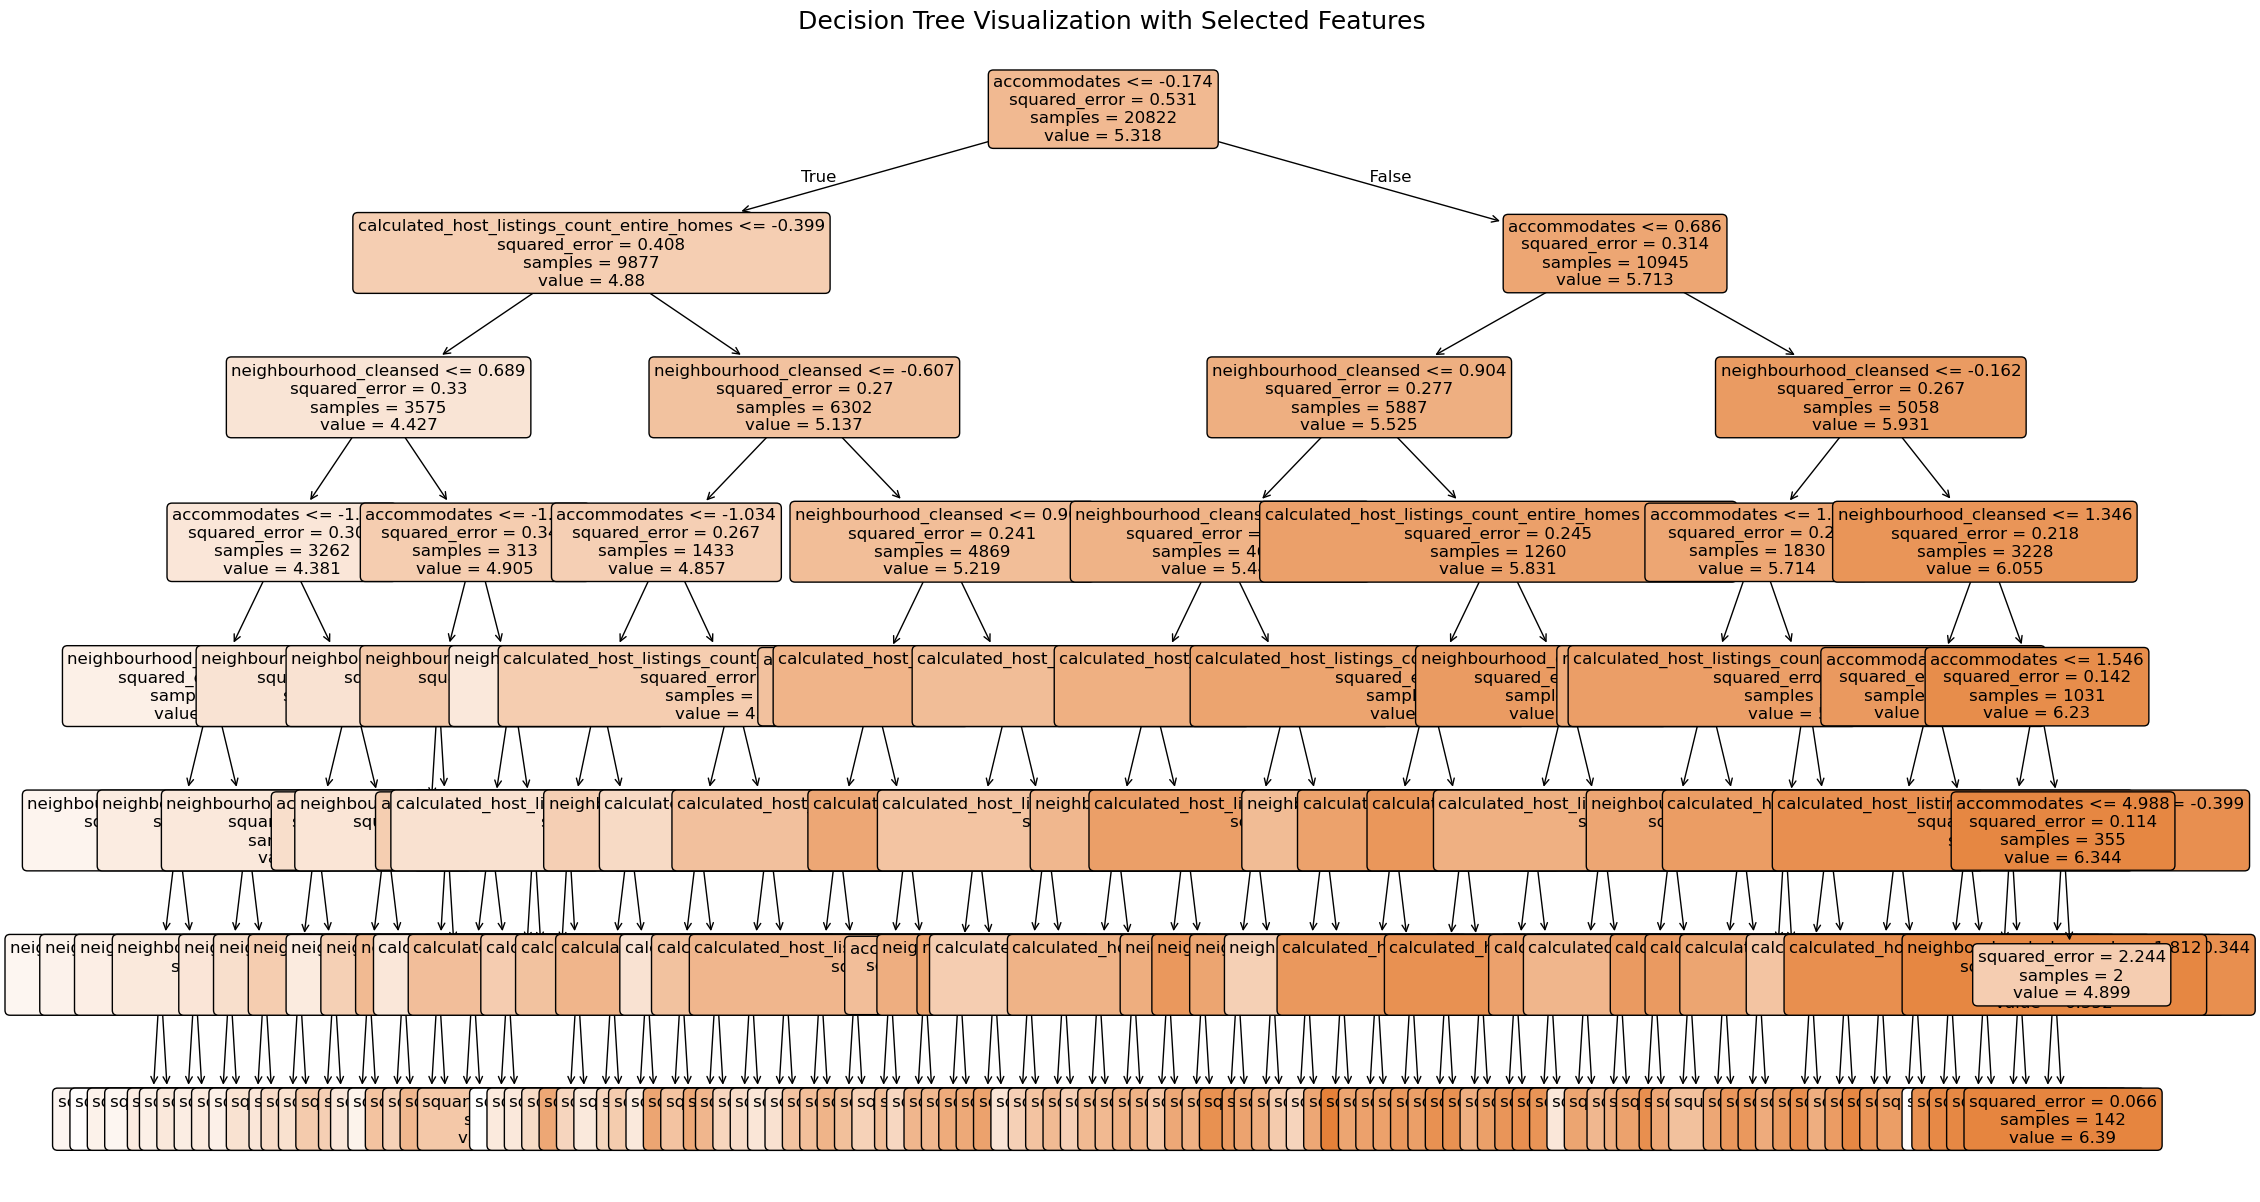

In [522]:
# 5. Decision Tree with Random Search (Using Selected Features)
param_dist = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}
dt_model = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_selected, y_train)

# Best decision tree model
best_params = random_search.best_params_
print(f"Best Parameters for Decision Tree: {best_params}")
dt_best_model = random_search.best_estimator_

# Plotting the best decision tree (Using Selected Features)
plt.figure(figsize=(25, 15))
plot_tree(dt_best_model, filled=True, feature_names=important_features, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization with Selected Features', fontsize=18)
plt.show()

In [523]:
# Model stacking
estimators = [('linear', best_lasso_model), ('rf', best_rf_model), ('xgb', best_xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Lasso())
stacking_model.fit(X_train_selected, y_train)

StackingRegressor(estimators=[('linear', Lasso(alpha=0.01, random_state=42)),
                              ('rf',
                               RandomForestRegressor(max_depth=7,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Lasso())

In [524]:
# Model evaluation
models = {'Linear Regression': linear_model,
          'Random Forest': best_rf_model,
          'XGBoost': best_xgb_model,
          'Lasso Regression': best_lasso_model,
          'Decision Tree': dt_best_model,
          'Stacking Model': stacking_model}

results = {
    'Model': [],
    'RMSE': [],
    'R-squared': [],
    'MAE': [],
    'MSE': []
}

for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results['Model'].append(name)
    results['RMSE'].append(rmse)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    results['MAE'].append(mae)
    print(f"{name} - RMSE: {rmse:.2f}")
    print(f"{name} - MSE: {mse:.2f}")
    print(f"{name} - MAE: {mae:.2f}")
    print(f"{name} - R^2: {r2:.2f}\n")
    print("--------------------------------------------")

# Create results DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Linear Regression - RMSE: 0.54
Linear Regression - MSE: 0.29
Linear Regression - MAE: 0.43
Linear Regression - R^2: 0.45

--------------------------------------------
Random Forest - RMSE: 0.46
Random Forest - MSE: 0.21
Random Forest - MAE: 0.36
Random Forest - R^2: 0.60

--------------------------------------------
XGBoost - RMSE: 0.45
XGBoost - MSE: 0.20
XGBoost - MAE: 0.35
XGBoost - R^2: 0.62

--------------------------------------------
Lasso Regression - RMSE: 0.54
Lasso Regression - MSE: 0.29
Lasso Regression - MAE: 0.43
Lasso Regression - R^2: 0.45

--------------------------------------------
Decision Tree - RMSE: 0.47
Decision Tree - MSE: 0.22
Decision Tree - MAE: 0.37
Decision Tree - R^2: 0.59

--------------------------------------------
Stacking Model - RMSE: 0.73
Stacking Model - MSE: 0.53
Stacking Model - MAE: 0.59
Stacking Model - R^2: -0.00

--------------------------------------------
               Model      RMSE  R-squared       MAE       MSE
0  Linear Regression  0